In [1]:
from torchvision.io import read_video
from torchvision.utils import make_grid

# not segmentation 
video, _, _ = read_video("/workspace/data/test/no_seg.mp4", pts_unit="sec")
# with segmentation
# video, _, _ = read_video("/workspace/data/test/seg.mp4", pts_unit="sec")
video.shape

torch.Size([84, 512, 512, 3])

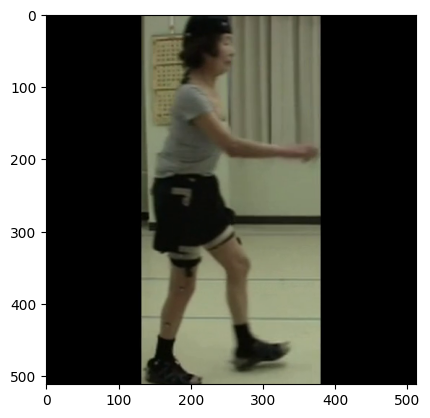

In [2]:
import matplotlib.pyplot as plt

plt.imshow(video[30])

# Why we need segmentation in human gait recognition?

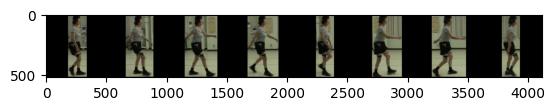

In [22]:
from pytorchvideo.transforms.functional import uniform_temporal_subsample

video_8 = uniform_temporal_subsample(video[10:40], 8, temporal_dim=0)
video_8_row = make_grid(video_8.permute(0, 3, 1, 2), nrow=8)
plt.imshow(video_8_row.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


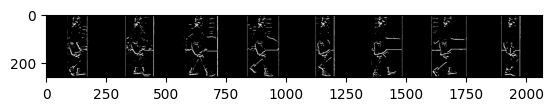

In [35]:
from torch.nn import Conv3d, BatchNorm3d, MaxPool3d

conv3d = Conv3d(in_channels=3, out_channels=1, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))

ft_8 = conv3d(video_8.permute(3,0,1,2).float())

ft_map_8 = make_grid(ft_8.permute(1,0,2,3), nrow=8)
plt.imshow(ft_map_8.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


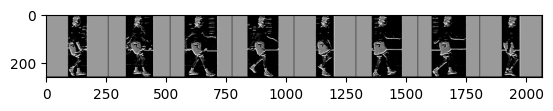

In [36]:
bn3d = BatchNorm3d(num_features=1)

ft_8_bn = bn3d(ft_8.unsqueeze(0))
ft_map_8_bn = make_grid(ft_8_bn.squeeze(0).permute(1,0,2,3), nrow=8)
plt.imshow(ft_map_8_bn.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


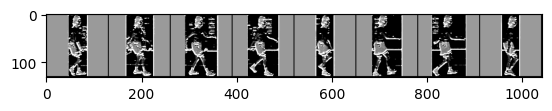

In [50]:
maxpool3d = MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1))

ans = maxpool3d(ft_8_bn.squeeze(dim=0))

ans = make_grid(ans.permute(1,0,2,3), nrow=8)
plt.imshow(ans.permute(1, 2, 0))

# Why we need Optical FLow in human gait recognition?

In [57]:
from torchvision.models.optical_flow import Raft_Large_Weights, raft_large
from torchvision.utils import make_grid, flow_to_image


op_video = video_8.permute(0,3,1,2).float() # make sure f, c, h, w

weights = Raft_Large_Weights.DEFAULT
transforms = weights.transforms()

model = raft_large(weights=weights)

current_frame = op_video[:-1, ...] # 0-1 frames 
next_frame = op_video[1:, ...] # 1-last frames

# transforms
current_frame, next_frame = transforms(current_frame, next_frame)

of_8 = model(current_frame, next_frame)[-1]
of_8.shape

torch.Size([7, 2, 512, 512])

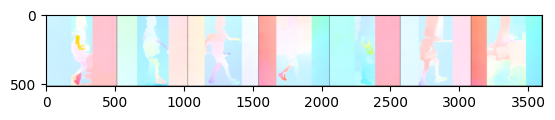

In [58]:
flow_image = flow_to_image(of_8)

ans = make_grid(flow_image, nrow=8)
plt.imshow(ans.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


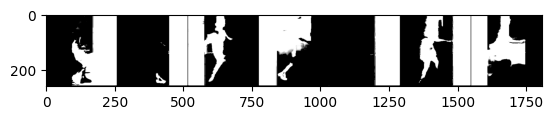

In [63]:
conv3d = Conv3d(in_channels=2, out_channels=1, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3))

ft_8 = conv3d(of_8.permute(1,0,2,3))

ft_map_8 = make_grid(ft_8.permute(1,0,2,3), nrow=8)
plt.imshow(ft_map_8.permute(1, 2, 0))